### Streams
* bring funcitonal programming to java, from java 8
* advantages are: 
    * make you a more efficient java programmer (less lines of code for complex stuff)
    * make heavy use of lambdas expressions
    * parallel streams make it very easy to multi-thread operations
* 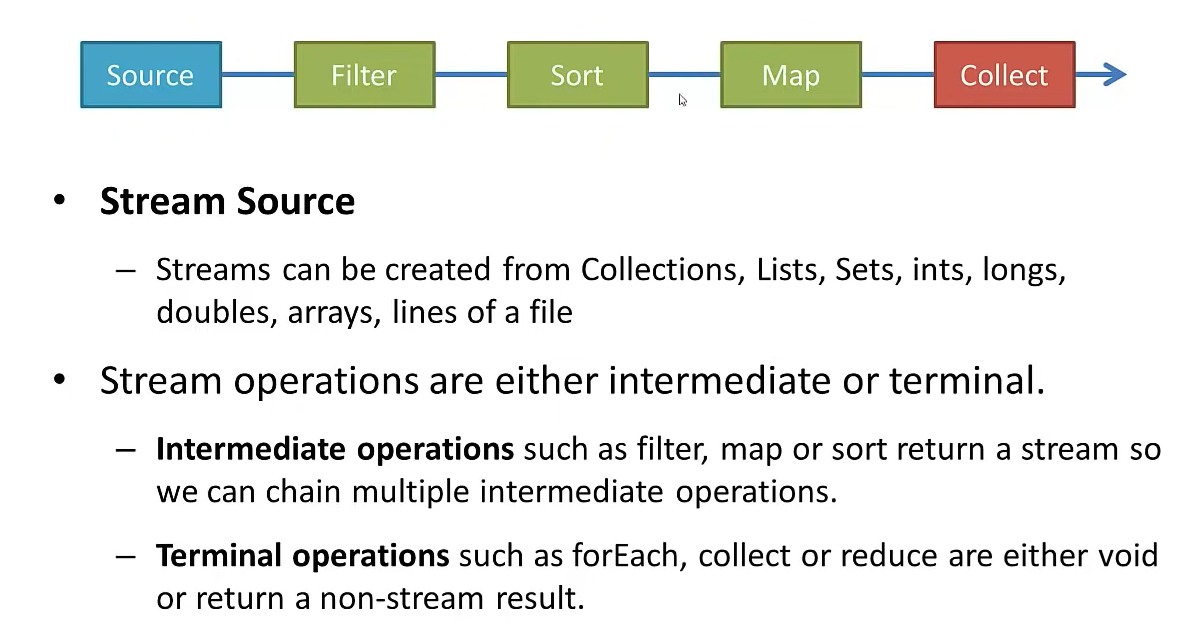
    * Intermidiate operations recieve a `stream`, 0 or more intermidiate operations are allowed (order matters)
    * Filter first, before doing sort or map. And this is because it will reduce the number of elements
* 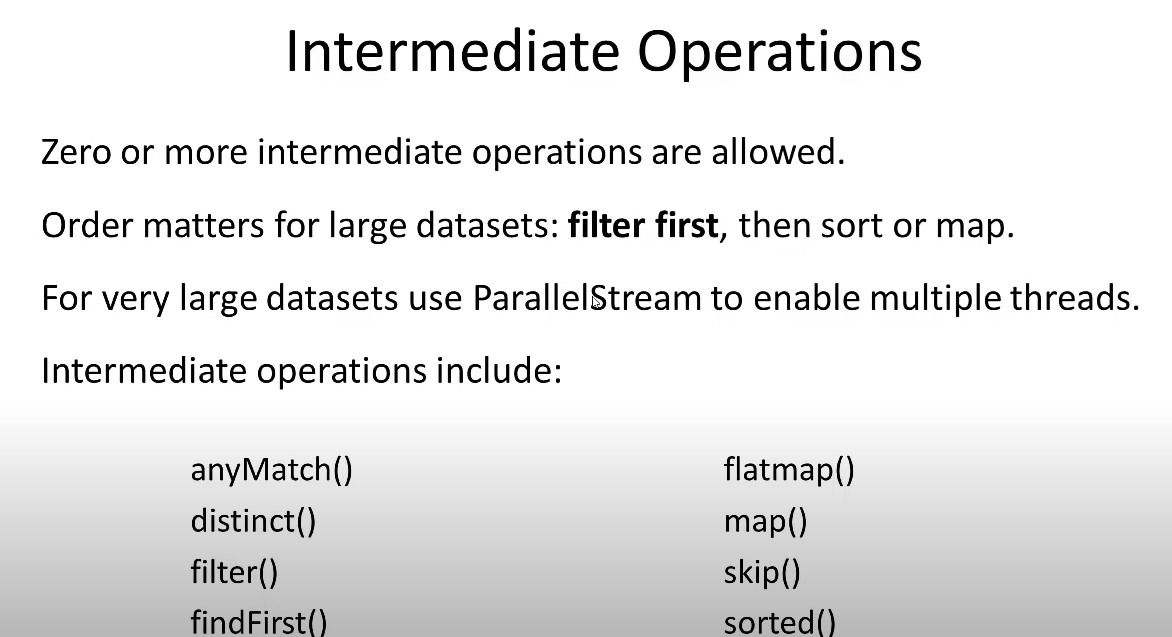
    * distinct() --> we can filter out non distinct elements
    * skip() --> we can skip elements
* 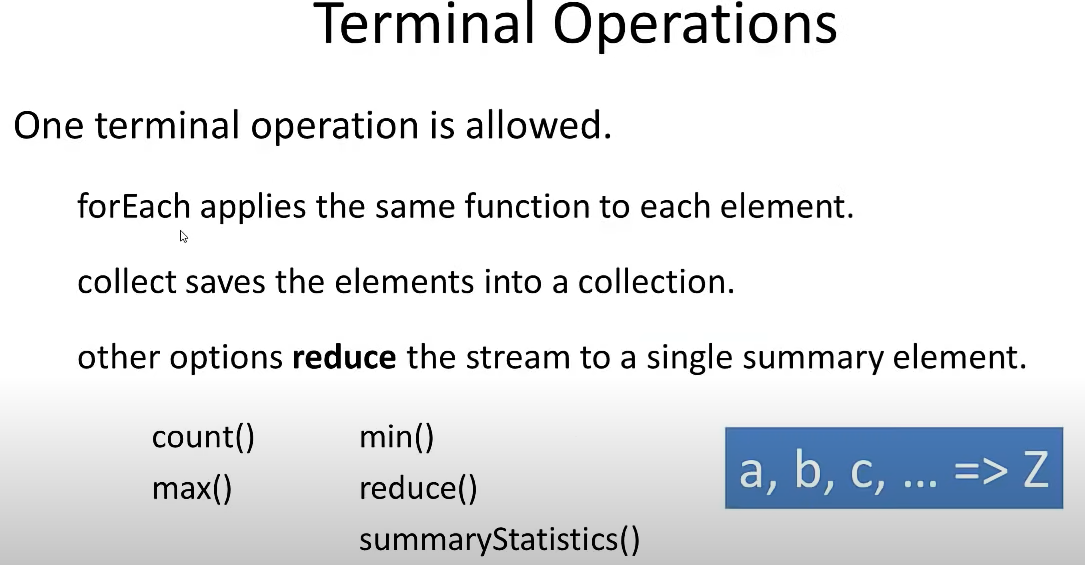
    * Only one terminal operation
    * forEach applies the same function to each element (like print)
    * collects: it saves the elements in a collection

* Example 8.1 FROM PDF
    * select dished with less than 320 calories

In [10]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        
        //ex 8.1 takeWhile and dropWhile
        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //select dished with less than 320 calories
        List<Dish> filteredMenu = specialMenu.stream()
                //.filter(x -> x.calories() < 320) //.filter(dish -> dish.calories() < 320)
                //or
                .takeWhile(dish -> dish.calories()  < 320)

                //or dropWhile
                //.dropWhile(dish -> dish.calories()  < 320)
                .toList();
        System.out.println(filteredMenu);
        }
}

Main.main(new String[]{});

[Dish[name=seasonal fruit, vegetarian=true, calories=120, type=OTHER], Dish[name=prawns, vegetarian=false, calories=300, type=FISH]]


* Example 8.2
    * Select the first three dishes with less than 500 calories

In [11]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //ex 8.2 limit and skip
        //limit --> it limits the size
        //skip --> skip the frist number of items
        //select the first three dishes with less than 500 calories
        List<Dish> filteredMenu2 = specialMenu.stream()
                .takeWhile(dish -> dish.calories() <500) //predicate acepts and argument and returns a boolean
                //.limit(3) //there are four dishes but I will get only the first 3 (I will get 120, 300, 350 but no 400)
                //or skip
                .skip(2) //there are four dishes but I will skip the frist 2 (I will skip 120 and 300 getting only 350, and 400)
                .toList();
        System.out.print(filteredMenu2);
        }
}

Main.main(new String[]{});

[Dish[name=rice, vegetarian=true, calories=350, type=OTHER], Dish[name=chicken, vegetarian=false, calories=400, type=MEAT]]

* Example 8.3
    * get a list of all the dishe's name

In [12]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //ex 8.3 get a list of all the name
        List<String> filteredMenu3 = specialMenu.stream()
                .map(dish -> dish.name()) //pass each dish object and get dish.name
                //or
                //.map(Dish::name)
                .toList();
        System.out.print(filteredMenu3);
        }
}

Main.main(new String[]{});

[seasonal fruit, prawns, rice, chicken, frech Fries]

* Example 8.4
    * get a list of all the dishe's name to upper case

In [13]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //ex 8.4 get a list of all the name
        List<String> filteredMenu4 = specialMenu.stream()
                .map(dish -> dish.name()) //pass each dish object and get dish.nam
                .map(string -> string.toUpperCase())
                //or
                ////.map(String::toUpperCase)
                .toList();
        System.out.print(filteredMenu4);
        }
}

Main.main(new String[]{});

[SEASONAL FRUIT, PRAWNS, RICE, CHICKEN, FRECH FRIES]

* Example 8.5
    * Create a single stream from two streams

In [17]:
import java.util.stream.*;
//----------------------
public class Main{
    public static void main(String[]args){        
        //flattening Streams --> used when we need to transform the element of a stream into a new stream.
        //8.5 create a single stream from two streams
        Stream.of(Stream.of(1,2), Stream.of(3,4), Stream.of(5,6))
                .flatMap(x -> x) //used when you want to flatten streams into a single stream
                .forEach(System.out::print);
        }
}

Main.main(new String[]{});

123456

* Example 8.6
    * Create a single stream from two list

In [16]:
import java.util.stream.*;
//----------------------
public class Main{
    public static void main(String[]args){        
        //8.6 create a single stream from two list
        Stream.of(List.of(5,9), List.of(6,3,1))
                .flatMap(list -> list.stream()) //flatting the list to a stream
                .forEachOrdered(System.out::print);
        }
}

Main.main(new String[]{});

59631

* Example 8.7
    * Create a list of unique characters from the list of strings

In [15]:
import java.util.stream.*;
//----------------------
public class Main{
    public static void main(String[]args){        
        //8.7 create a list of unique characters from the list of strings
        List<String> strings = List.of("Bruno", "Morena", "Gianna");
        //create a stream from the list
        List<String> uniques = strings.stream()
                //split each char
                .map(word -> word.split(""))
                //flatten into a a single array of stream
                .flatMap(x-> Arrays.stream(x))
                //take the uniques (distinct)
                .distinct()
                //terminal op.
                .toList();
        System.out.println(uniques);
        }
}

Main.main(new String[]{});

[B, r, u, n, o, M, e, a, G, i]


* Example 8.9
    * Counting elements

In [20]:
import java.util.stream.*;
//----------------------
public class Main{
    public static void main(String[]args){        
        //8.9 Counting elements
        long value = Stream.of(1,2,3,4)
                //take the even
                .filter(n -> n % 2 == 0)
                //how many do we have
                .count();
        System.out.println(value);
        }
}

Main.main(new String[]{});

2


* Example 8.10
    * consuming elements with forEach

In [23]:
import java.util.stream.*;
//----------------------
public class Main{
    public static void main(String[]args){        
        //8.10 consuming elements with forEach
        Stream.of(1,2,3,4)
                //take the even
                .filter(n -> n % 2 == 0)
                .forEach(System.out::println);
        }
}

Main.main(new String[]{});

2
4


* Example 8.11
    * Matching

In [24]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //8.11 Matching --> WRONG WAY
//        List<Dish> anyVegetarian = specialMenu.stream()
//                .anyMatch(dish -> dish.vegetarian());
        //8.11 Matching --> RIGHT WAY
        boolean anyVegetarian = specialMenu.stream()
                // is there at leat one match
                .anyMatch(dish -> dish.vegetarian());
                //or
                //.anyMatch(Dish::vegetarian)

        }
}

Main.main(new String[]{});

* Example 8.12 --> allMatch()
    * Is the menu vegetarian only

In [25]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //8.12 is the menu vegetarian only
        boolean isVegetarian = specialMenu.stream()
                //are all the dishes vegetarian
                .allMatch(Dish::vegetarian);

        }
}

Main.main(new String[]{});

* Example 8.13 --> noMatch()
    * are all dishes free from meat and fish?

In [26]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //8.13 are all dishes free from meat and fish?
        boolean noMeatNoFish = specialMenu.stream()
                //there is no match --> returns true
                .noneMatch(Dish::vegetarian);

        }
}

Main.main(new String[]{});

* Example 8.14
    * Find a vegetarian dish

In [28]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //8.14 find any vegetarian dish
        List<Dish> dish = specialMenu.stream()
                .filter(Dish::vegetarian)
                .toList();
        //There are vegeratians, but what if we don't know it, and we'd like to discover it?
        System.out.println(dish);
        //
        //8.14 If we want to discover if there are any vegetarians, we shoudl return an optional
        Optional<Dish> dish2 = specialMenu.stream()
                .filter(Dish::vegetarian)
                //is there any vegetarian??... in other words, filter returns true at least once? show me it
                .findAny();
        System.out.println(dish2);
        
        }
}

Main.main(new String[]{});

[Dish[name=seasonal fruit, vegetarian=true, calories=120, type=OTHER], Dish[name=rice, vegetarian=true, calories=350, type=OTHER], Dish[name=frech Fries, vegetarian=true, calories=530, type=OTHER]]
Optional[Dish[name=seasonal fruit, vegetarian=true, calories=120, type=OTHER]]


* Example 8.15
    * Find a vegetarian dish WITH meat

In [29]:
import java.util.stream.*;
public record Dish(String name, boolean vegetarian, int calories, Type type) {
        public enum Type {MEAT, FISH, OTHER}
}
//----------------------
public class Main{
    public static void main(String[]args){        

        List<Dish> specialMenu = Arrays.asList(
                new Dish("seasonal fruit", true, 120, Dish.Type.OTHER),
                new Dish("prawns", false, 300, Dish.Type.FISH),
                new Dish("rice", true, 350, Dish.Type.OTHER),
                new Dish("chicken", false, 400, Dish.Type.MEAT),
                new Dish("frech Fries",true, 530, Dish.Type.OTHER)
        );
        //8.15 find a vegetarian dish WITH meat
        Optional<Dish> dish3 = specialMenu.stream()
                //filter by vegetarian
                .filter(dish -> dish.vegetarian())
                //filter again by meat
                .filter(dish -> dish.type() == Dish.Type.MEAT)
                .findAny();      
        }
}

Main.main(new String[]{});